In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('darkgrid')
import statsmodels.api as sm


def illustrate_learning(a=1.3, b=0.5, n=30, r=1, make_prediction=False, random_lines=0, plot_errors=False):
    """
    This is a function I got from a introductory course I made some years ago in Amsterdam. 
    params: 
    a: slope
    b: intercept
    n: sample size
    r: error
    make_prediction: boolean. Does not make a real prediction, simply adds a value for illustrative purposes
    random_lines: plots random regression lines
    plot_errors: plot the difference between example points and regression line, for illustrative purposes
    """
    np.random.seed(42)
    def f(x, r_low=0, r_high=1): return (a * x + b + r * np.random.uniform(r_low, r_high, len(x)))

    x = np.random.rand(n)
    y = f(x)
    fig, ax = plt.subplots()
    ax.set_xlim([-0.05, 1.15])    
    # plot regression result
    sns.regplot(x, y, ci=None)
    # plot random lines, similar to the fitted regression result
    for _ in range(random_lines):
        sns.regplot(x, f(x, r_low=-1, r_high=2), ci=None, scatter=False)
    # make prediction with regression result
    if make_prediction:
        x_ = np.array(max(x) + 0.1).reshape(1,1) 
        plt.plot(x_, f(x_), 'ro')
    # plot largest two errors (positive and negative)
    if plot_errors:
        x_max, x_min = np.argmax(y - f(x)), np.argmin(y - f(x))
        X = sm.tools.add_constant(x)
        model = sm.OLS(y, X).fit()
        for i in [x_min, x_max]:
            plt.vlines(x[i], ymin=model.predict([1, x[i]]), ymax=y[i], linestyle='--', color='black', linewidth=0.9)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.show()

/home/julien/anaconda3/envs/data_blog/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


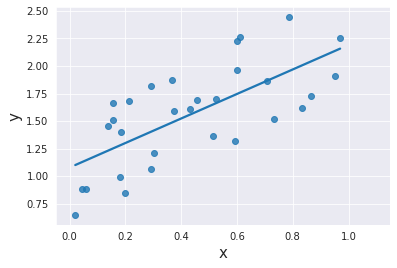

In [2]:
illustrate_learning()